In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("CBFC.csv", index_col=[0])
df.head()

,movie_id,name,lang,cert_no,cert_date,cert_length,producer,applicant,lang_id,movie_category,regional_office
0,2,SUNA SANKHAALI,ORIYA,CIL/1/2/2004-CUT,16-01-2004,4907.6001 Mts,Shri Pradeep Bhol. Cuttack,NIL,53,U (Unrestricted Public Exhibition),CUTTACK
1,3,YE JUGARA KRUSHNA SUDAMA,ORIYA,CIL/1/1/2003-CUT,07-01-2003,5104.8901 Mts,"Shri Binaya Nazik, M/s.Brajaraj Movies",NIL,53,U (Unrestricted Public Exhibition),CUTTACK
2,4,MAYER SHAKTI,BENGALI,CIL/1/10/2003-CUT,12-08-2003,4495.8501 Mts,Shri BijoiKumar Kandoi,NIL,42,U (Unrestricted Public Exhibition),CUTTACK
3,5,JE PANCHE PARA MANDA,ORIYA,CIL/1/12/2003-CUT,25-08-2003,5085.4399 Mts,Shri Niranjan Rana,NIL,53,U (Unrestricted Public Exhibition),CUTTACK
4,6,MAYER MON,BENGALI,CIL/1/13/2003-CUT,30-08-2003,4805.2798 Mts,Shri Ratikanta Kanungo,NIL,42,U (Unrestricted Public Exhibition),CUTTACK


In [ ]:
# df1 = pd.read_excel("cbfc.xlsx", index_col=[0])
# df1.to_csv("CBFC.csv")

In [9]:
date_lis = df["cert_date"].values
type(date_lis[0])

str

In [20]:
days = []
exception_c = 0 #counting exceptions for when dates werent mentioned
for date in date_lis:
    try:
        vals = date.split("-")
        date1 = datetime.date(int(vals[2]),int(vals[1]),int(vals[0]))
        day = date1.strftime("%A")
        days.append(day)
    except ValueError:    #This weirdly enough did not happen(unlike in the last consolidated csv there is just one delimiter)
        print(date, type(date))
        vals = date.split("/")
        date1 = datetime.date(int(vals[2]),int(vals[1]),int(vals[0]))
        day = date1.strftime("%A")
        days.append(day)
    except Exception as e:
        exception_c += 1
        continue

In [22]:
exception_c #// for which the dates werent mentioned
df[df["cert_date"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 397863 to 494521
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         520 non-null    int64 
 1   name             0 non-null      object
 2   lang             0 non-null      object
 3   cert_no          0 non-null      object
 4   cert_date        0 non-null      object
 5   cert_length      0 non-null      object
 6   producer         0 non-null      object
 7   applicant        0 non-null      object
 8   lang_id          520 non-null    int64 
 9   movie_category   0 non-null      object
 10  regional_office  0 non-null      object
dtypes: int64(2), object(9)
memory usage: 48.8+ KB


In [18]:
def todict(arr):
    d = {"Monday":0, "Tuesday":0, "Wednesday":0, "Thursday":0, "Friday":0, "Saturday":0, "Sunday":0}
    for elem in arr:
            d[elem] += 1
    return d
days_dic = todict(days)
lis = ["M"]

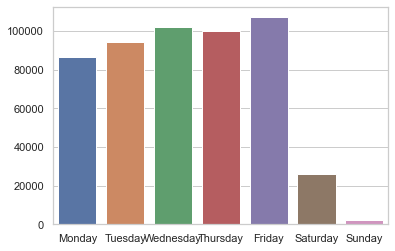

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(days_dic.keys()), y=list(days_dic.values()))

In [40]:
list(days_dic.keys())

['Saturday', 'Monday', 'Wednesday', 'Tuesday', 'Friday', 'Thursday', 'Sunday']